In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
train_df=pd.read_csv("train_preprocessed_1.csv")
test_df=pd.read_csv("test_preprocessed_1.csv")
sample_submission = pd.read_csv("sample_submission_V9Inaty.csv")

In [3]:
#train_df.select_dtypes(exclude = np.number).columns

In [4]:
#test_df.select_dtypes(exclude = np.number).columns

In [5]:
train_X = train_df.drop(columns=[ "Purchase","data","User_ID","Product_ID"])
train_y = np.log1p(train_df['Purchase'])
test_X = test_df.drop(columns=[ "User_ID","Product_ID"])

In [6]:
def model_fit(model, train_X, train_y, test_X, filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train RMSE : ",mean_squared_error(np.log1p(train_y), np.log1p(train_pred), squared=False))
    #print(type(test_pred))
    submit=test_df[["User_ID","Product_ID"]]
    submit['Purchase'] = np.abs(np.expm1(test_pred))
    #sample_submission['Purchase'] = np.abs(np.expm1(test_pred))
    submit.to_csv(filename, index = False)
    return  submit

In [8]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X,  "linear_regression.csv" )

Train RMSE :  0.047778656748218185


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [13]:
model = Ridge(alpha=0.8)
linear_res = model_fit(model, train_X, train_y, test_X,  "Ridge.csv" )

Train RMSE :  0.047788319873560824


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [15]:
model = Lasso(alpha=0.2)
linear_res = model_fit(model, train_X, train_y, test_X,  "Lasso.csv" )

Train RMSE :  0.06644661358537911


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [20]:
model = ElasticNet(alpha=0.2)
linear_res = model_fit(model, train_X, train_y, test_X, "elastic_net.csv" )

Train RMSE :  0.06402313969174275


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [21]:
model = KNeighborsRegressor()
KNN = model_fit(model, train_X, train_y, test_X, "knn_default.csv" )

Train RMSE :  0.05442692921032831


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [22]:
 model = KNeighborsRegressor(n_neighbors=2)
KNN = model_fit(model, train_X, train_y, test_X, "knn_2.csv" )

Train RMSE :  0.04059591960528891


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [23]:
 model = KNeighborsRegressor(n_neighbors=3)
KNN = model_fit(model, train_X, train_y, test_X, "knn_3.csv" )

Train RMSE :  0.047982080041505656


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [24]:
 model = KNeighborsRegressor(n_neighbors=6)
KNN = model_fit(model, train_X, train_y, test_X, "knn_6.csv" )

Train RMSE :  0.05628884790219422


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [25]:
 model = KNeighborsRegressor(n_neighbors=7)
KNN = model_fit(model, train_X, train_y, test_X, "knn_7.csv" )

Train RMSE :  0.057665020905728566


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


In [26]:
 model = KNeighborsRegressor(n_neighbors=9)
KNN = model_fit(model, train_X, train_y, test_X, "knn_9.csv" )

Train RMSE :  0.05958456200212867


<ipython-input-6-f744b7978d14>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['Purchase'] = np.abs(np.expm1(test_pred))


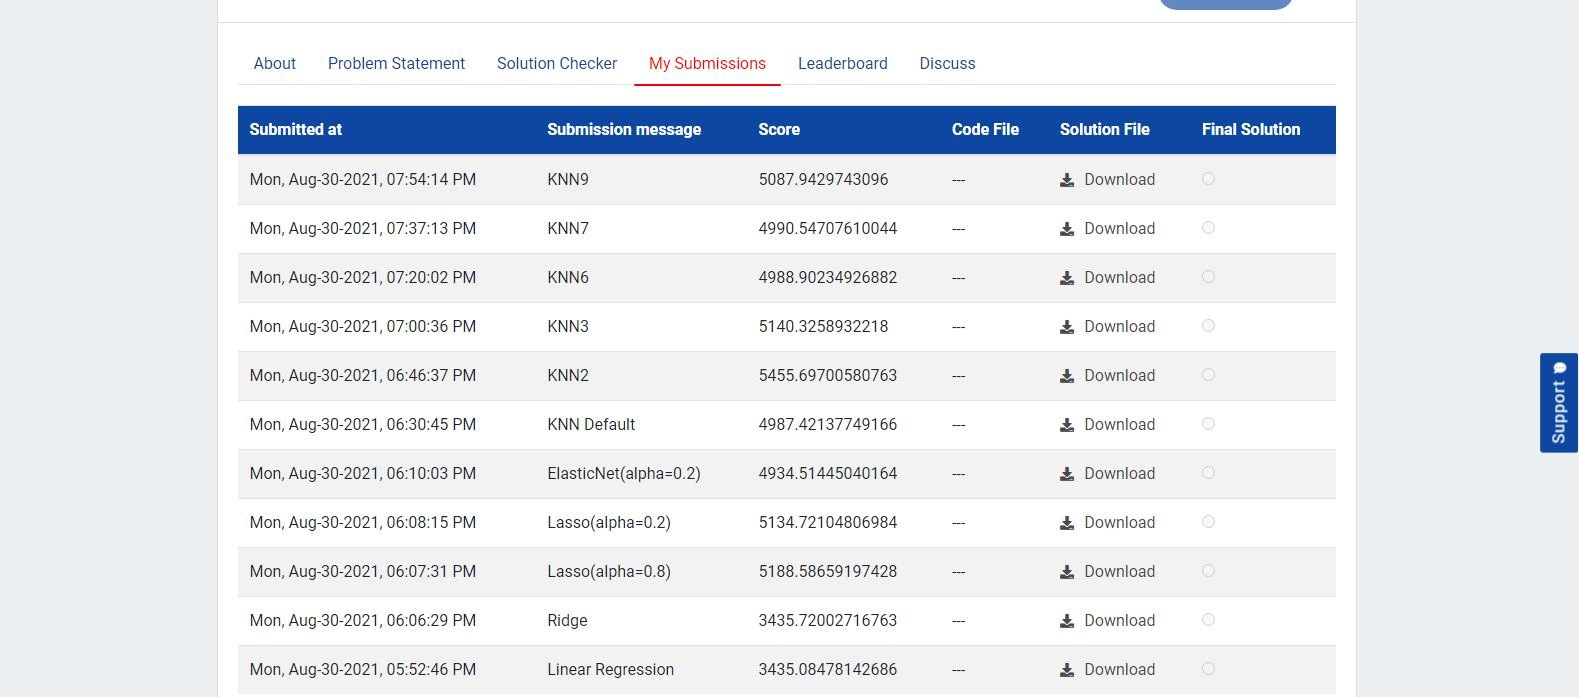

In [27]:
from IPython.display import Image
Image(filename='Score.JPG')